<a href="https://colab.research.google.com/github/Joker00229/D-DOCUMENT-Cours-GITHUB/blob/master/SPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import ee
import xarray as xr

In [9]:
!pip install xee
import xee


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.2 MB/s eta 0:00:00


In [10]:
ee.Authenticate()
ee.Initialize(project = 'ee-zoulyadeinit', opt_url = 'https://earthengine-highvolume.googleapis.com')

In [11]:
time_start = ee.Date('2000')
time_end = ee.Date('2024')
time_dif = time_end.difference(time_start, 'month').round()
time_list = ee.List.sequence(0, ee.Number(time_dif).subtract(1),1).map(lambda x: time_start.advance(x, 'month'))

In [12]:
col = ee.ImageCollection("NOAA/PERSIANN-CDR").filterDate(time_start, time_end)

In [13]:
def monthly(date):
  start_date = ee.Date(date)
  end_date = start_date.advance(1, 'month')
  img = col.filterDate(start_date, end_date).sum()
  return img.set('system:time_start', start_date.millis())

In [14]:
monthly_col = ee.ImageCollection(time_list.map(monthly))

In [33]:
loc = [0.75, 6.0, 3.0, 12.5]

In [34]:
ds = xr.open_dataset(monthly_col, engine = 'ee', crs = 'EPSG:4326', scale = 0.27, geometry = loc)

In [35]:
ds

<xarray.Dataset> Size: 224kB
Dimensions:        (time: 288, lon: 8, lat: 24)
Coordinates:
  * time           (time) datetime64[ns] 2kB 2000-01-01 ... 2023-12-01
  * lon            (lon) float64 64B 0.885 1.155 1.425 ... 2.235 2.505 2.775
  * lat            (lat) float64 192B 6.135 6.405 6.675 ... 11.8 12.07 12.35
Data variables:
    precipitation  (time, lon, lat) float32 221kB ...
Attributes:
    crs:      EPSG:4326

In [36]:
annual = ds.resample(time = 'YE').sum('time')

In [37]:
annual

<xarray.Dataset> Size: 19kB
Dimensions:        (time: 24, lon: 8, lat: 24)
Coordinates:
  * lon            (lon) float64 64B 0.885 1.155 1.425 ... 2.235 2.505 2.775
  * lat            (lat) float64 192B 6.135 6.405 6.675 ... 11.8 12.07 12.35
  * time           (time) datetime64[ns] 192B 2000-12-31 ... 2023-12-31
Data variables:
    precipitation  (time, lon, lat) float32 18kB 869.5 1.07e+03 ... 803.5 734.6
Attributes:
    crs:      EPSG:4326

In [38]:
import matplotlib.pyplot as plt

In [39]:
print(annual)

<xarray.Dataset> Size: 19kB
Dimensions:        (time: 24, lon: 8, lat: 24)
Coordinates:
  * lon            (lon) float64 64B 0.885 1.155 1.425 ... 2.235 2.505 2.775
  * lat            (lat) float64 192B 6.135 6.405 6.675 ... 11.8 12.07 12.35
  * time           (time) datetime64[ns] 192B 2000-12-31 ... 2023-12-31
Data variables:
    precipitation  (time, lon, lat) float32 18kB 869.5 1.07e+03 ... 803.5 734.6
Attributes:
    crs:      EPSG:4326


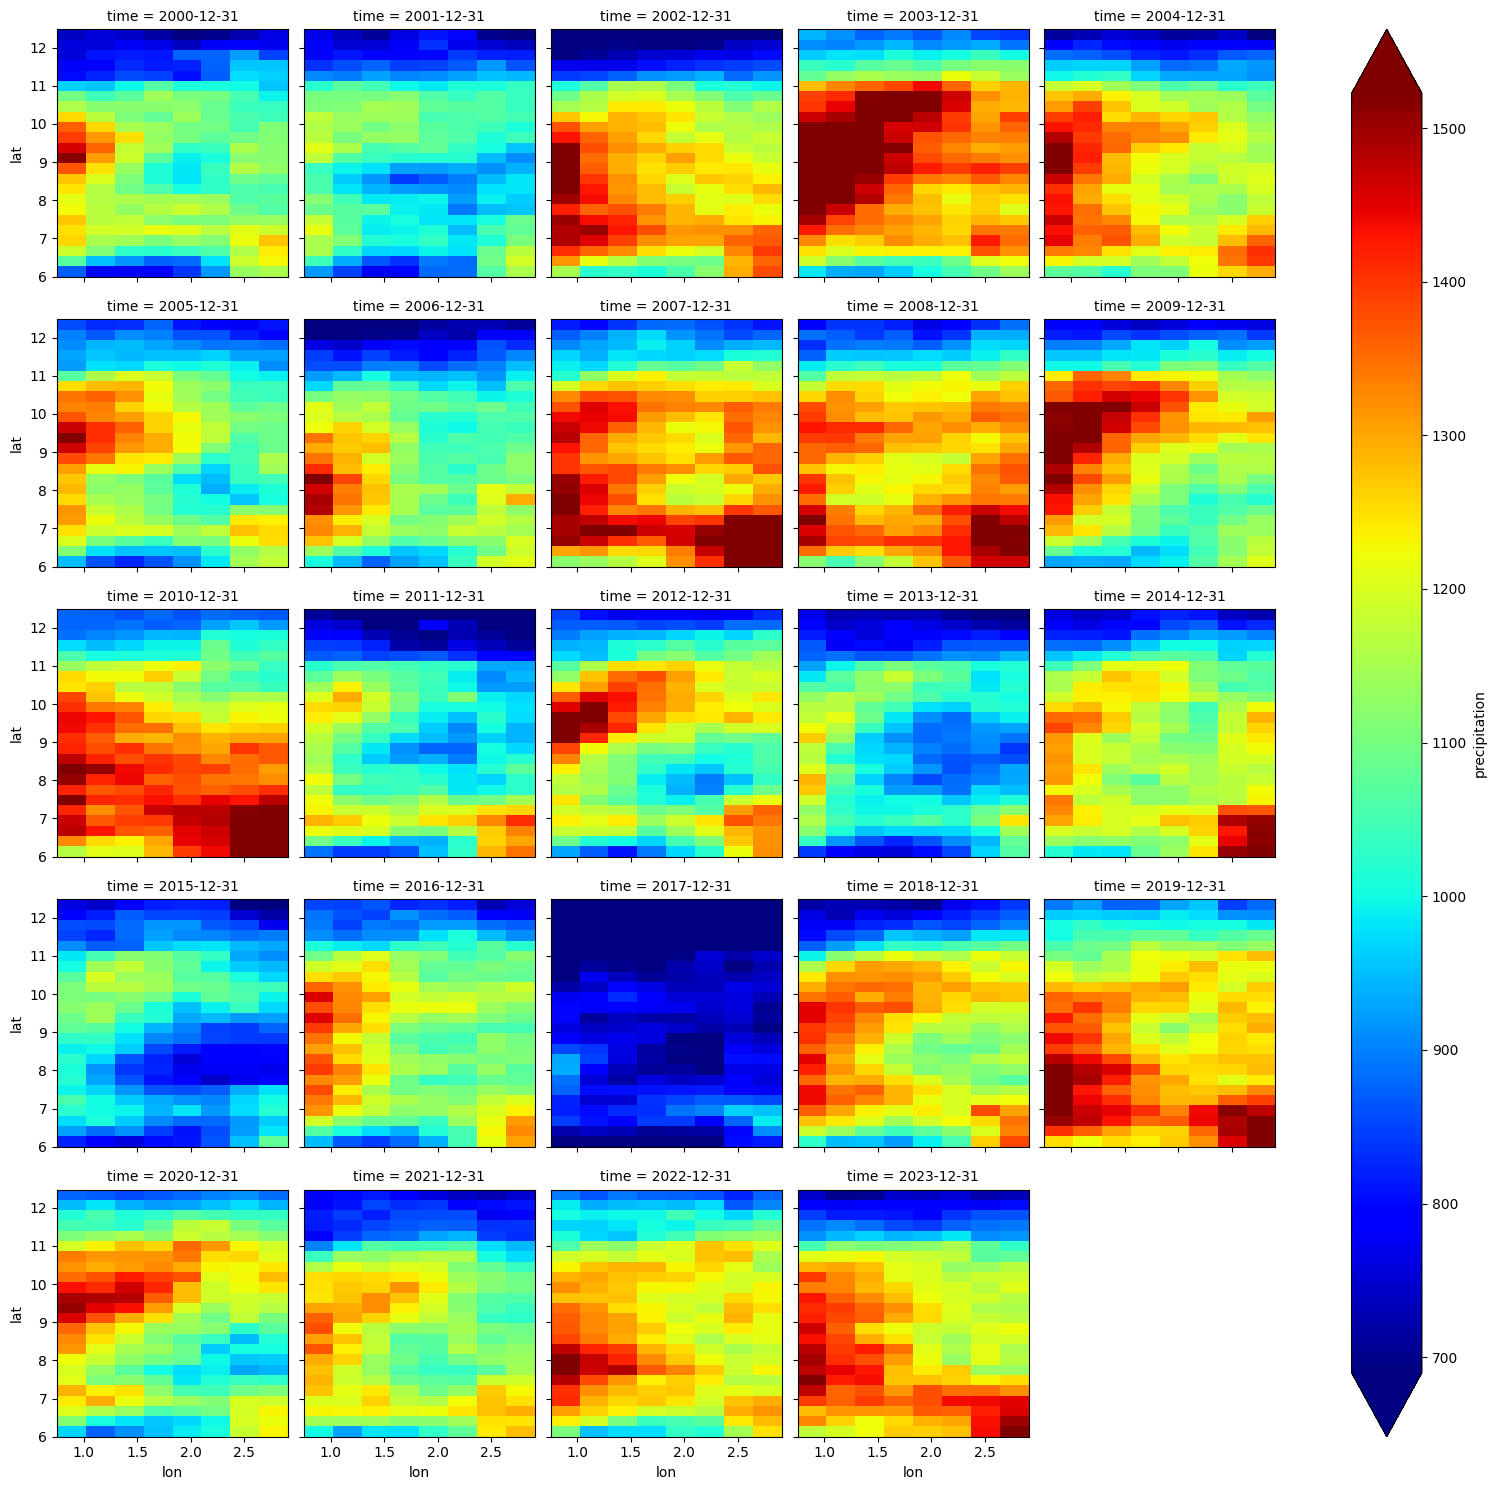

In [40]:
annual.precipitation.plot(x = 'lon', y = 'lat', cmap = 'jet', col = 'time', robust = True, col_wrap = 5)


In [41]:
point = ds.sel(lon = 2.5375864406003945, lat = 6.535836718703871, method = 'nearest')

In [42]:
point

<xarray.Dataset> Size: 3kB
Dimensions:        (time: 288)
Coordinates:
  * time           (time) datetime64[ns] 2kB 2000-01-01 ... 2023-12-01
    lon            float64 8B 2.505
    lat            float64 8B 6.405
Data variables:
    precipitation  (time) float32 1kB ...
Attributes:
    crs:      EPSG:4326

In [43]:
point.time.values

point.precipitation.values

array([  5.0461946 ,   6.7531204 ,  36.89268   ,  90.252754  ,
       150.54735   , 265.73972   , 120.408134  , 113.81594   ,
       272.93625   ,  95.903275  ,  22.573175  ,   5.9844837 ,
         8.4869    ,   5.519185  ,  51.99073   , 125.53807   ,
       219.44955   , 241.67522   , 125.23888   ,  21.143387  ,
       128.69508   ,  90.34196   ,  34.72009   ,  40.734665  ,
         5.3020434 ,  25.324434  ,  73.92963   , 158.56284   ,
        96.9894    , 325.94614   , 260.04044   ,  39.0217    ,
        74.351074  , 184.42827   ,  40.57503   ,   3.4984648 ,
        42.66982   ,  30.292059  ,  37.466267  , 167.59409   ,
       111.51445   , 306.54025   ,  58.789097  ,  34.130344  ,
       170.55327   , 180.13638   ,  54.394115  ,  10.406554  ,
        71.89545   ,  27.708271  ,  47.13412   ,  75.20935   ,
       246.241     , 167.72943   , 108.010574  ,  37.239532  ,
       326.16455   , 186.44914   ,  50.528038  ,   2.4380603 ,
         1.3352913 ,  29.358274  , 126.965385  ,  98.19

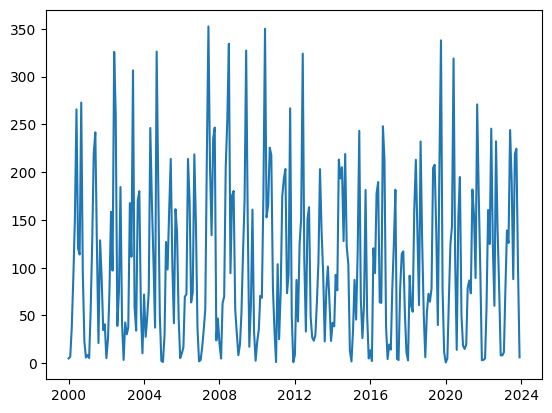

In [44]:
plt.plot(point.time, point.precipitation)

In [46]:
!pip install standard_precip

In [47]:
from standard_precip import spi

In [48]:
import pandas as pd

In [49]:
date = point.time.values
pr = point.precipitation.values

In [50]:
df = pd.DataFrame({'date': date, 'pr': pr})

In [51]:
df

,date,pr
0,2000-01-01,5.046195
1,2000-02-01,6.753120
2,2000-03-01,36.892681
3,2000-04-01,90.252754
4,2000-05-01,150.547348
...,...,...
283,2023-08-01,88.049149
284,2023-09-01,219.049515
285,2023-10-01,224.516403
286,2023-11-01,100.057182


In [52]:
spi_fun = spi.SPI()


In [53]:
spi_12months = spi_fun.calculate(df, 'date', 'pr', freq = 'M', scale = 12, fit_type ='lmom', dist_type = 'gam')


In [55]:
spi_12months.to_csv('spi_12month.csv')


In [56]:
spi_12months

,date,pr_scale_12,pr_scale_12_calculated_index
0,2000-01-01,NaN,NaN
1,2000-02-01,NaN,NaN
2,2000-03-01,NaN,NaN
3,2000-04-01,NaN,NaN
4,2000-05-01,NaN,NaN
...,...,...,...
283,2023-08-01,1341.950765,0.682394
284,2023-09-01,1328.680562,0.579771
285,2023-10-01,1413.106526,0.893512
286,2023-11-01,1435.220471,0.935344


In [57]:
from standard_precip.utils import plot_index

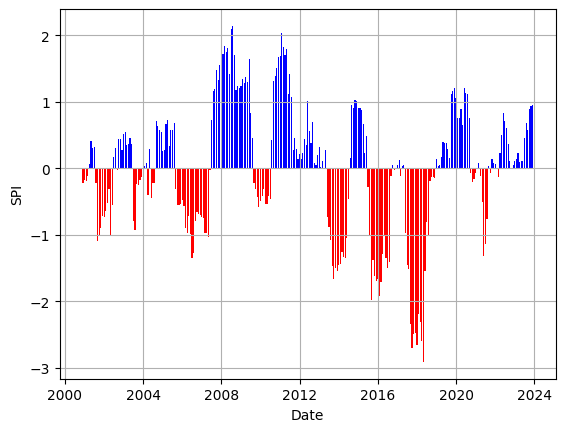

In [58]:
fig = plot_index(spi_12months, 'date', 'pr_scale_12_calculated_index')

Étape 1 : Identifier les périodes critiques avec le SPI
Un SPI ≥ +1.5 sur 1, 3 ou 12 mois = période avec excès de pluie anormal → potentiel d’inondation.

Tu peux tracer le graphe SPI (ce que tu as déjà fait) et repérer les pics.

In [59]:
spi_12months[spi_12months['pr_scale_12_calculated_index'] >= 1.5]

,date,pr_scale_12,pr_scale_12_calculated_index
95,2007-12-01,1572.586675,1.557458
96,2008-01-01,1589.898024,1.741918
97,2008-02-01,1577.539876,1.729047
98,2008-03-01,1605.844972,1.842874
99,2008-04-01,1619.180070,1.748202
100,2008-05-01,1610.048234,1.815477
102,2008-07-01,1640.355669,2.104060
103,2008-08-01,1600.587823,2.144032
104,2008-09-01,1540.845010,1.711526
113,2009-06-01,1565.135197,1.653643


Étape 2 : Regarder la précipitation réelle pendant ces pics
Dans tes données SPI, tu as aussi la colonne 'pr' (pluie en mm).

Compare ces valeurs à la capacité d’absorption du sol et à la pluviométrie normale.

In [60]:
df[df['date'].isin(spi_12months[spi_12months['pr_scale_12_calculated_index'] >= 1.5]['date'])]

,date,pr,pr_scale_12
95,2007-12-01,46.879639,1572.586675
96,2008-01-01,20.761675,1589.898024
97,2008-02-01,4.902009,1577.539876
98,2008-03-01,62.734409,1605.844972
99,2008-04-01,69.844238,1619.180070
100,2008-05-01,204.957748,1610.048234
102,2008-07-01,334.392883,1640.355669
103,2008-08-01,94.221565,1600.587823
104,2008-09-01,175.599243,1540.845010
113,2009-06-01,327.360474,1565.135197
